<a href="https://colab.research.google.com/github/Shadoww002/PyTorch-Learning/blob/main/Chapter%202%20%E2%80%93%20Neural%20Network%20Classification/Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import sklearn

In [143]:
## make classification data
from sklearn.datasets import make_circles

n_samples = 1000

X , y = make_circles(n_samples,
                     noise = 0.03,
                     random_state=42)

len(X) , len(y)

(1000, 1000)

In [144]:
X[:5] , y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [145]:
# Make Dataframe of circle data
import pandas as pd

circles = pd.DataFrame({"X1" : X[:,0],
                        "X2" : X[:,1],
                        "Lable" : y})

circles.head(10)

,X1,X2,Lable
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


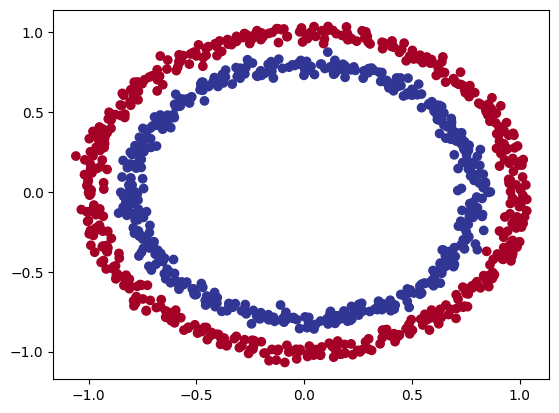

In [146]:
## Visualise The Data
import matplotlib.pyplot as plt
plt.scatter(x = X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)


In [147]:
## Input And Output Shapes Of Data
X.shape , y.shape

((1000, 2), (1000,))

In [148]:
type(X) , type(y)

(numpy.ndarray, numpy.ndarray)

In [149]:
## Convert Data to Tensors
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [150]:
type(X) , type(y)

(torch.Tensor, torch.Tensor)

In [151]:
X[:5] , y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [152]:
##Split Data into training and test sets
from sklearn.model_selection import train_test_split
X_train ,  X_test , y_train , y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=42)

len(X_train),len(X_test) , len(y_train) , len(y_test)

(800, 200, 800, 200)

In [153]:
## Building a Model

In [154]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [155]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [156]:
X_train.shape

torch.Size([800, 2])

In [157]:
y_train[0]

tensor(1.)

In [158]:
## Creating a Model Class

class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2 ,
                             out_features=5)
    self.layer_2 = nn.Linear(in_features=5 ,
                             out_features=1)

  def forward(self , x):
    return (self.layer_2(self.layer_1(x)))

model_0 = CircleModel()
model_0.to(device)
model_0

CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [159]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [160]:
## Lets Recreate above Model using NN.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2 ,
              out_features=5),
    nn.Linear(in_features=5 ,
              out_features=1)
).to(device)

In [161]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [162]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [163]:
X_test[:10,] , y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [164]:
## Making Predictions using untrained Model
with torch.inference_mode():
  model_0.eval()
  untrained_pred = model_0(X_test.to(device))

In [165]:
untrained_pred[:10].to(device)

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')

In [166]:
## Setting Up Loss And Optimiser Functions
loss_fn = nn.BCEWithLogitsLoss()

optimiser = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [167]:
## Calculating the Accuracy
def accuracy_fn(y_true ,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [168]:
## Understanding the First 5 outputs i.e raw logits
with torch.inference_mode():
  model_0.eval()
  y_logits = model_0(X_test.to(device))
y_logits[:5]


tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [169]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [170]:
## converting the y_logits to prediction Probabilities with sigmoid function
y_pred_prob = torch.sigmoid(y_logits.to(device))

In [171]:
y_pred_prob[:5]

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

In [172]:
torch.round(y_pred_prob)[:5]

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

In [173]:
## Building a Training LOOP
## setting seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

##No of iterations
epochs = 100

##Putting Data on Device
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

for epoch in range(epochs):
  ## model to train mode
  model_0.train()

  #do forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #calculate the loss
  loss = loss_fn(y_logits , y_train)
  acc = accuracy_fn(y_pred = y_pred ,
                    y_true = y_train)

  # zero grad the optimiser
  optimiser.zero_grad()

  #back propogation
  loss.backward()

  #gradient descent
  optimiser.step()

  ### Testing LOOP
  model_0.eval()

  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits , y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

    ## print The INFO
    if epoch % 50 == 0:
      print(f"Epoch : {epoch} | loss : {loss:.5f} | Train_acc : {acc:.2f}% | test_loss : {test_loss:.5f} | Test_acc : {test_acc:.2f}%")


Epoch : 0 | loss : 0.69796 | Train_acc : 51.88% | test_loss : 0.69460 | Test_acc : 57.50%
Epoch : 50 | loss : 0.69675 | Train_acc : 51.38% | test_loss : 0.69370 | Test_acc : 56.00%
Epoch : 100 | loss : 0.69592 | Train_acc : 51.12% | test_loss : 0.69315 | Test_acc : 54.00%
Epoch : 150 | loss : 0.69534 | Train_acc : 51.62% | test_loss : 0.69280 | Test_acc : 52.00%
Epoch : 200 | loss : 0.69492 | Train_acc : 51.62% | test_loss : 0.69259 | Test_acc : 50.50%
Epoch : 250 | loss : 0.69461 | Train_acc : 52.00% | test_loss : 0.69245 | Test_acc : 49.50%
Epoch : 300 | loss : 0.69436 | Train_acc : 51.00% | test_loss : 0.69238 | Test_acc : 49.00%
Epoch : 350 | loss : 0.69417 | Train_acc : 51.38% | test_loss : 0.69234 | Test_acc : 49.50%
Epoch : 400 | loss : 0.69402 | Train_acc : 50.75% | test_loss : 0.69232 | Test_acc : 51.00%
Epoch : 450 | loss : 0.69389 | Train_acc : 50.50% | test_loss : 0.69232 | Test_acc : 51.50%
Epoch : 500 | loss : 0.69379 | Train_acc : 50.25% | test_loss : 0.69233 | Test_acc 

In [174]:
## Using the helper Function From a repo
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


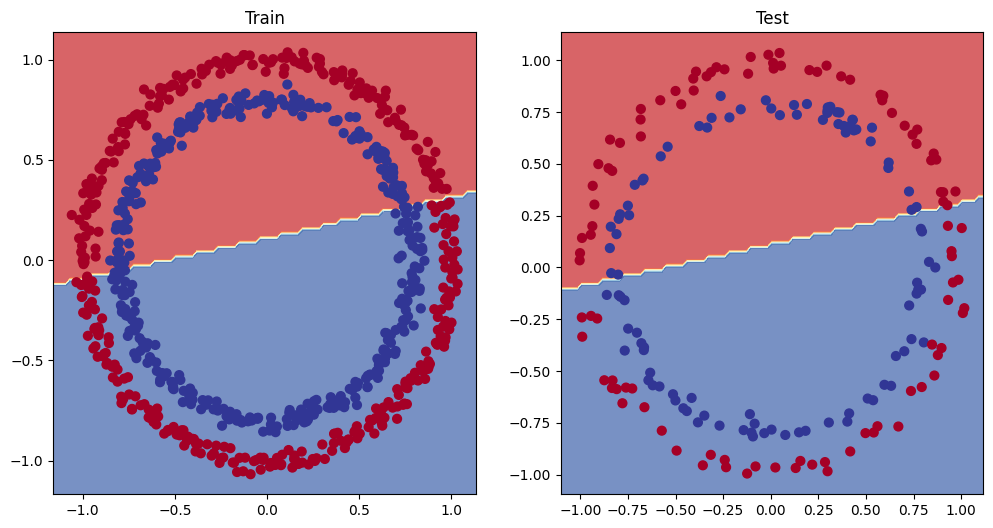

In [175]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [178]:
## Improving the Model By adding the layer and Adding the more features/hidden units
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2 ,
                             out_features=64)
    self.layer_2 = nn.Linear(in_features=64,
                             out_features=128)
    self.layer_3 = nn.Linear(in_features=128 ,
                             out_features=256)
    self.layer_4 = nn.Linear(in_features=256 ,
                             out_features=128)
    self.layer_5 = nn.Linear(in_features=128 ,
                             out_features=64)
    self.layer_6 = nn.Linear(in_features=64 ,
                             out_features=1)

  def forward(self , x):
    return (self.layer_6(self.layer_5(self.layer_4(self.layer_3(self.layer_2(self.layer_1(x)))))))

model_1 = CircleModel()
model_1.to(device)
model_1

CircleModel(
  (layer_1): Linear(in_features=2, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=256, bias=True)
  (layer_4): Linear(in_features=256, out_features=128, bias=True)
  (layer_5): Linear(in_features=128, out_features=64, bias=True)
  (layer_6): Linear(in_features=64, out_features=1, bias=True)
)

In [179]:
## Setting Up Loss And Optimiser Functions
loss_fn = nn.BCEWithLogitsLoss()

optimiser = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [181]:
## Building a Training LOOP
## setting seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

##No of iterations
epochs = 1000

##Putting Data on Device
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

for epoch in range(epochs):
  ## model to train mode
  model_1.train()

  #do forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #calculate the loss
  loss = loss_fn(y_logits , y_train)
  acc = accuracy_fn(y_pred = y_pred ,
                    y_true = y_train)

  # zero grad the optimiser
  optimiser.zero_grad()

  #back propogation
  loss.backward()

  #gradient descent
  optimiser.step()

  ### Testing LOOP
  model_1.eval()

  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits , y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

    ## print The INFO
    if epoch % 50 == 0:
      print(f"Epoch : {epoch} | loss : {loss:.5f} | Train_acc : {acc:.2f}% | test_loss : {test_loss:.5f} | Test_acc : {test_acc:.2f}%")


Epoch : 0 | loss : 0.69359 | Train_acc : 53.50% | test_loss : 0.69315 | Test_acc : 52.00%
Epoch : 50 | loss : 0.69342 | Train_acc : 54.62% | test_loss : 0.69308 | Test_acc : 54.50%
Epoch : 100 | loss : 0.69333 | Train_acc : 51.50% | test_loss : 0.69309 | Test_acc : 56.00%
Epoch : 150 | loss : 0.69327 | Train_acc : 49.75% | test_loss : 0.69314 | Test_acc : 55.00%
Epoch : 200 | loss : 0.69323 | Train_acc : 49.75% | test_loss : 0.69320 | Test_acc : 55.50%
Epoch : 250 | loss : 0.69320 | Train_acc : 49.62% | test_loss : 0.69327 | Test_acc : 53.50%
Epoch : 300 | loss : 0.69317 | Train_acc : 49.88% | test_loss : 0.69334 | Test_acc : 54.00%
Epoch : 350 | loss : 0.69315 | Train_acc : 50.38% | test_loss : 0.69340 | Test_acc : 53.00%
Epoch : 400 | loss : 0.69313 | Train_acc : 50.50% | test_loss : 0.69347 | Test_acc : 51.00%
Epoch : 450 | loss : 0.69312 | Train_acc : 50.25% | test_loss : 0.69353 | Test_acc : 51.00%
Epoch : 500 | loss : 0.69310 | Train_acc : 50.50% | test_loss : 0.69359 | Test_acc 

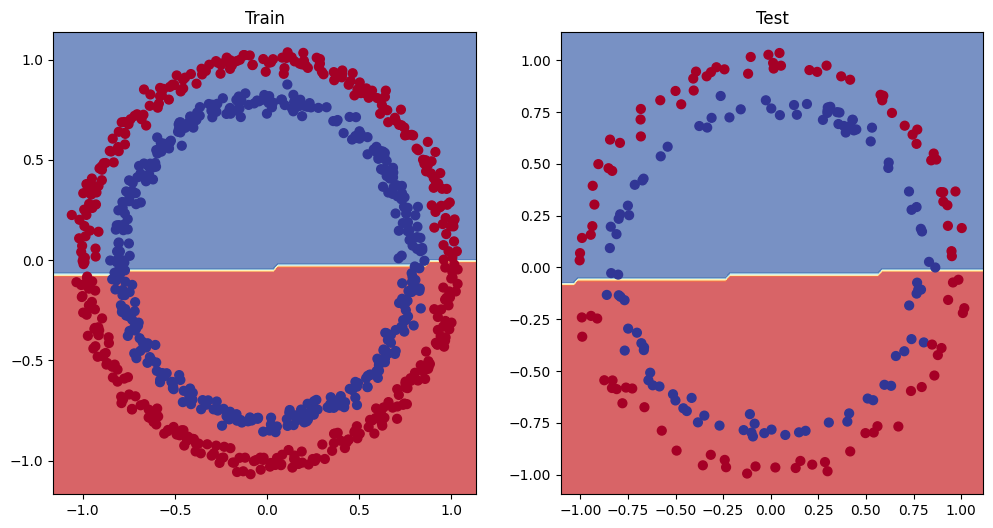

In [183]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [193]:
## Using The Above Model For the Linear Data Predictions
torch.manual_seed(42)
#creation the data
sample_size = 100
bias = 0.35
weight = 0.85

X = torch.Tensor(torch.arange(0 , sample_size , 0.37))
y = X*weight + bias

In [194]:
X[:5] , y[:5]

(tensor([0.0000, 0.3700, 0.7400, 1.1100, 1.4800]),
 tensor([0.3500, 0.6645, 0.9790, 1.2935, 1.6080]))

In [195]:
##Split Data into training and test sets
from sklearn.model_selection import train_test_split
X_train ,  X_test , y_train , y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=42)

len(X_train),len(X_test) , len(y_train) , len(y_test)

(216, 55, 216, 55)

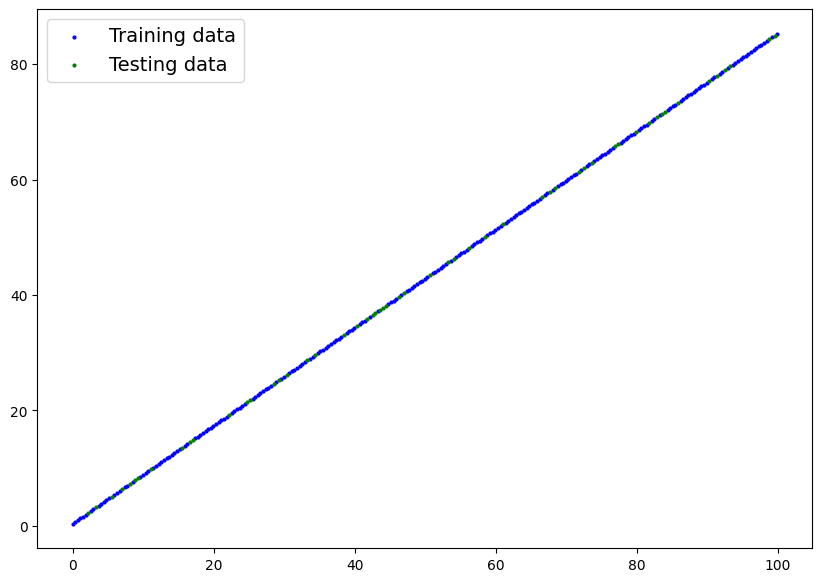

In [197]:
plot_predictions(train_data=X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test)

In [203]:
## Creating Model with same architecture but diff Features
import torch
from torch import nn

model_2 = nn.Sequential(
    nn.Linear(in_features=1 ,
              out_features=64),
    nn.Linear(in_features=64,
              out_features=128),
    nn.Linear(in_features=128 ,
              out_features=256),
    nn.Linear(in_features=256 ,
              out_features=128),
    nn.Linear(in_features=128 ,
              out_features=64),
    nn.Linear(in_features=64 ,
              out_features=1)

).to(device)

model_2


Sequential(
  (0): Linear(in_features=1, out_features=64, bias=True)
  (1): Linear(in_features=64, out_features=128, bias=True)
  (2): Linear(in_features=128, out_features=256, bias=True)
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): Linear(in_features=64, out_features=1, bias=True)
)

In [204]:
loss_fn = nn.L1Loss()
optm = torch.optim.SGD(params=model_2.parameters(),
                       lr = 0.01)